    Topic:        Project 1  
    Subject:      Campaign Placement for WomenTechWomenYes Canvassing  
    Date:         07/09/2018  
    Name:         Courtney  
    Worked with:  Tim, Brandon

In [53]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from copy import deepcopy

%matplotlib inline

**Import pickeled data file with 4hr interval entries and exits per turnstile**

In [97]:
with open('weighted_4hr_interval_mta.pickle','rb') as read_file:
    time_series_df = pickle.load(read_file)

In [98]:
time_series_df.shape

(2519821, 17)

In [99]:
time_series_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,EXITS,DATE_TIME,DATE,DESC,TIME_INTERVAL,ENTRY_DIFF,EXIT_DIFF,LAT,LONG,ZIPCODE,WEIGHT
0,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224053.0,2018-03-31 03:59:00,2018-03-31,REGULAR,04:00:00,0.026906,0.011531,40.762796,-73.967686,10022,0.003844
1,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224053.0,2018-03-31 07:59:00,2018-03-31,REGULAR,04:00:00,0.000000,0.000000,40.762796,-73.967686,10022,0.003844
2,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224055.0,2018-03-31 11:59:00,2018-03-31,REGULAR,04:00:00,0.000000,0.007688,40.762796,-73.967686,10022,0.003844
3,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224055.0,2018-03-31 15:59:00,2018-03-31,REGULAR,04:00:00,0.000000,0.000000,40.762796,-73.967686,10022,0.003844
4,A002,R051,02-00-00,59 ST,NQR456W,6566470.0,2224055.0,2018-03-31 19:59:00,2018-03-31,REGULAR,04:00:00,0.000000,0.000000,40.762796,-73.967686,10022,0.003844


**ENTRIES per day at each subway station/line combination**

In [122]:
grouping = ['STATION','LINENAME','DATE']

In [123]:
daily_entries_per_station_line = time_series_df.groupby(by=grouping)['ENTRY_DIFF'].sum().reset_index()

In [124]:
daily_entries_per_station_line.shape

(42953, 4)

In [125]:
daily_entries_per_station_line['ENTRY_DIFF'].max()

2085.2342869440004

In [126]:
zero_mask_entries = (daily_entries_per_station_line.ENTRY_DIFF == 0)
daily_entries_per_station_line[zero_mask_entries].shape[0]

2808

In [127]:
daily_entries_per_station_line.head()

,STATION,LINENAME,DATE,ENTRY_DIFF
0,1 AV,L,2018-03-31,177.360380
1,1 AV,L,2018-04-01,129.434702
2,1 AV,L,2018-04-02,197.394620
3,1 AV,L,2018-04-03,212.583769
4,1 AV,L,2018-04-04,221.287784


**EXITS per day at each subway station/line combination**

In [128]:
daily_exits_per_station_line = time_series_df.groupby(by=grouping)['EXIT_DIFF'].sum().reset_index()

In [129]:
daily_exits_per_station_line.shape

(42953, 4)

In [130]:
daily_exits_per_station_line['EXIT_DIFF'].max()

942.3974629299997

In [131]:
zero_mask_exits = (daily_exits_per_station_line.EXIT_DIFF == 0)
daily_exits_per_station_line[zero_mask_exits].shape[0]

2851

In [132]:
daily_exits_per_station_line.head()

,STATION,LINENAME,DATE,EXIT_DIFF
0,1 AV,L,2018-03-31,193.900151
1,1 AV,L,2018-04-01,149.479662
2,1 AV,L,2018-04-02,211.254585
3,1 AV,L,2018-04-03,241.536410
4,1 AV,L,2018-04-04,238.824444


**Merge daily entries and exits by station-line into a single data file**

In [133]:
daily_station_line_counts = pd.merge(daily_entries_per_station_line, daily_exits_per_station_line, on=['STATION', 'LINENAME', 'DATE'])

In [134]:
daily_station_line_counts.head()

,STATION,LINENAME,DATE,ENTRY_DIFF,EXIT_DIFF
0,1 AV,L,2018-03-31,177.360380,193.900151
1,1 AV,L,2018-04-01,129.434702,149.479662
2,1 AV,L,2018-04-02,197.394620,211.254585
3,1 AV,L,2018-04-03,212.583769,241.536410
4,1 AV,L,2018-04-04,221.287784,238.824444


In [135]:
daily_station_line_counts.shape

(42953, 5)

**Remove days with zero ENTRIES or EXITS from the dataset. Assumption: subway stations that had 0 entries or exits for a full 24 hours are incorrect data or were closed, so removed**

In [136]:
daily_station_line_counts= daily_station_line_counts[daily_station_line_counts.ENTRY_DIFF != 0]

In [137]:
daily_station_line_counts= daily_station_line_counts[daily_station_line_counts.EXIT_DIFF != 0]

In [138]:
daily_station_line_counts.shape

(39987, 5)

**Get summed daily entries and exits for each day, by Station and Line**

In [139]:
daily_station_line_counts['DAILY_TOTAL'] = daily_station_line_counts['ENTRY_DIFF'] + daily_station_line_counts['EXIT_DIFF']

In [140]:
daily_station_line_counts.head()

,STATION,LINENAME,DATE,ENTRY_DIFF,EXIT_DIFF,DAILY_TOTAL
0,1 AV,L,2018-03-31,177.360380,193.900151,371.260531
1,1 AV,L,2018-04-01,129.434702,149.479662,278.914365
2,1 AV,L,2018-04-02,197.394620,211.254585,408.649205
3,1 AV,L,2018-04-03,212.583769,241.536410,454.120179
4,1 AV,L,2018-04-04,221.287784,238.824444,460.112229


In [141]:
daily_station_line_counts['DAILY_TOTAL'].max()

2583.8911036040004

**Save the daily totals by station-line file**

In [142]:
with open('daily_weighted_station_line_counts.pickle', 'wb') as to_write:
    pickle.dump(daily_station_line_counts, to_write)

In [143]:
with open('daily_weighted_station_line_counts.pickle','rb') as read_file:
    daily_station_line_counts = pickle.load(read_file)

In [144]:
daily_station_line_counts.head()

,STATION,LINENAME,DATE,ENTRY_DIFF,EXIT_DIFF,DAILY_TOTAL
0,1 AV,L,2018-03-31,177.360380,193.900151,371.260531
1,1 AV,L,2018-04-01,129.434702,149.479662,278.914365
2,1 AV,L,2018-04-02,197.394620,211.254585,408.649205
3,1 AV,L,2018-04-03,212.583769,241.536410,454.120179
4,1 AV,L,2018-04-04,221.287784,238.824444,460.112229


**Get total counts per station-line - over the entire season of April/May/June**

In [145]:
total_spring_station_line_counts = daily_station_line_counts.groupby(by=['STATION', 'LINENAME'])['DAILY_TOTAL'].sum().reset_index()

In [146]:
total_spring_station_line_counts.rename(columns={'DAILY_TOTAL': 'SPRING_TOTAL'}, inplace=True)

In [147]:
total_spring_station_line_counts.sort_values(by="SPRING_TOTAL", ascending=False).head(10)

,STATION,LINENAME,SPRING_TOTAL
28,14 ST-UNION SQ,LNQR456W,112740.091413
89,34 ST-HERALD SQ,BDFMNQRW,106947.123498
91,34 ST-PENN STA,ACE,83945.999421
319,JAY ST-METROTEC,ACF,77034.334487
198,BEDFORD AV,L,71651.720065
207,BOROUGH HALL,2345R,71296.330515
123,59 ST COLUMBUS,ABCD1,65365.271967
159,96 ST,123,59428.275745
27,14 ST-UNION SQ,456LNQRW,48753.182202
433,W 4 ST-WASH SQ,ABCDEFM,47261.987540


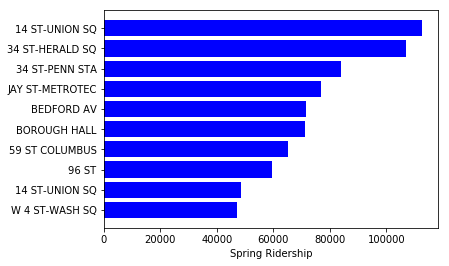

In [150]:
spring_riders = total_spring_station_line_counts.sort_values(by="SPRING_TOTAL", ascending=False).head(10)

fig, ax = plt.subplots()

stations = spring_riders.STATION
y_pos = np.arange(len(stations))
riders = spring_riders.SPRING_TOTAL

ax.barh(y_pos, riders, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(stations)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Spring Ridership')

plt.show()

In [173]:
daily_station_line_counts.columns

Index(['STATION', 'LINENAME', 'DATE', 'ENTRY_DIFF', 'EXIT_DIFF',
       'DAILY_TOTAL'],
      dtype='object')

In [186]:
mean_daily = daily_station_line_counts.groupby(by='DATE')['DAILY_TOTAL'].sum().reset_index()

Text(0.5,0,'Date')

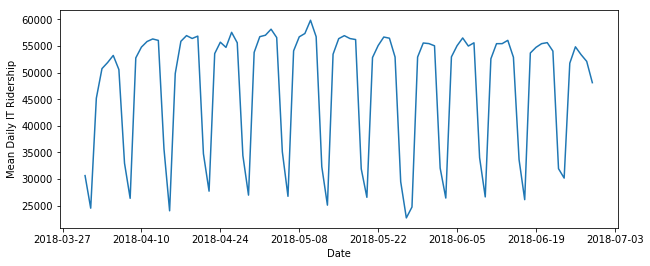

In [187]:
x = mean_daily.DATE
y = mean_daily.DAILY_TOTAL
fig=plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.ylabel('Mean Daily IT Ridership')
plt.xlabel('Date')